<a href="https://colab.research.google.com/github/sahupra1357/LLMAgents/blob/main/Bedrock_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python3 -m pip install -qU boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 6.1 MB/s eta 0:00:00


In [5]:
import os
from google.colab import userdata
import boto3
os.environ["AWS_ACCESS_KEY"] = userdata.get('AWS_ACCESS_KEY')
os.environ["AWS_SECRET_KEY"] = userdata.get('AWS_SECRET_KEY')
os.environ["AWS_REGION"] = userdata.get('AWS_REGION')
AWS_ACCESS_KEY = os.getenv('AWS_ACCESS_KEY')
AWS_SECRET_KEY = os.getenv('AWS_SECRET_KEY')
AWS_REGION = os.getenv('AWS_REGION')


In [8]:
boto3_bedrock = boto3.client(
    service_name="bedrock",
    region_name=AWS_REGION,
    aws_access_key_id=AWS_ACCESS_KEY,
    aws_secret_access_key=AWS_SECRET_KEY,
)

In [9]:
[models['modelId'] for models in boto3_bedrock.list_foundation_models()['modelSummaries']]

['amazon.titan-embed-text-v2:0',
 'amazon.nova-pro-v1:0',
 'amazon.nova-lite-v1:0',
 'amazon.nova-micro-v1:0',
 'anthropic.claude-3-5-sonnet-20240620-v1:0',
 'anthropic.claude-3-7-sonnet-20250219-v1:0',
 'anthropic.claude-3-haiku-20240307-v1:0:200k',
 'anthropic.claude-3-haiku-20240307-v1:0',
 'anthropic.claude-3-5-sonnet-20241022-v2:0',
 'anthropic.claude-3-5-haiku-20241022-v1:0',
 'deepseek.r1-v1:0',
 'meta.llama3-1-8b-instruct-v1:0:128k',
 'meta.llama3-1-8b-instruct-v1:0',
 'meta.llama3-1-70b-instruct-v1:0:128k',
 'meta.llama3-1-70b-instruct-v1:0',
 'meta.llama3-1-405b-instruct-v1:0',
 'meta.llama3-2-11b-instruct-v1:0',
 'meta.llama3-2-90b-instruct-v1:0',
 'meta.llama3-2-1b-instruct-v1:0',
 'meta.llama3-2-3b-instruct-v1:0',
 'meta.llama3-3-70b-instruct-v1:0']

## Amazon Nova

In [10]:
import boto3
import botocore
import json

bedrock_runtime  = boto3.client(
    service_name="bedrock-runtime",
    region_name=AWS_REGION,
    aws_access_key_id=AWS_ACCESS_KEY,
    aws_secret_access_key=AWS_SECRET_KEY,
)

In [11]:
# If you'd like to try your own prompt, edit this parameter!
prompt_data = """Command: Write me a blog about making strong business decisions as a leader.

Blog:
"""

In [12]:
try:

    body = json.dumps(
        {
            "messages": [{"role": "user", "content": [{"text": prompt_data}]}],
            "inferenceConfig": {
                "max_new_tokens": 100,
                "top_p": 0.9,
                "top_k": 20,
                "temperature": 0.7
            }
        }
    )
    modelId = "us.amazon.nova-lite-v1:0" # amazon.nova-lite-v1:0
    accept = "application/json"
    contentType = "application/json"

    response = bedrock_runtime.invoke_model(
        body=body, modelId=modelId, accept=accept, contentType=contentType
    )
    response_body = json.loads(response.get("body").read())

    print(response_body["output"]["message"]["content"][0]['text'])

except botocore.exceptions.ClientError as error:

    if error.response['Error']['Code'] == 'AccessDeniedException':
           print(f"\x1b[41m{error.response['Error']['Message']}\
                \nTo troubeshoot this issue please refer to the following resources.\
                 \nhttps://docs.aws.amazon.com/IAM/latest/UserGuide/troubleshoot_access-denied.html\
                 \nhttps://docs.aws.amazon.com/bedrock/latest/userguide/security-iam.html\x1b[0m\n")

    else:
        raise error

**Making Strong Business Decisions as a Leader**

In the fast-paced world of business, making strong decisions is a cornerstone of effective leadership. As a leader, your decisions can significantly impact your team, your organization, and your bottom line. Here’s a guide to making strong business decisions that can steer your company toward success.

### 1. **Understand the Importance of Decision-Making**

Decision-making is not just about choosing between options; it’s about setting the direction for your


## Stability Stable Diffusion XL

In [16]:
bedrock_runtime_us1  = boto3.client(
    service_name="bedrock-runtime",
    region_name="us-east-1",
    aws_access_key_id=AWS_ACCESS_KEY,
    aws_secret_access_key=AWS_SECRET_KEY,
)

In [17]:
prompt_data = "a landscape with trees"
body = json.dumps({
    "text_prompts": [{"text": prompt_data}],
    "cfg_scale": 10,
    "seed": 20,
    "steps": 50
})
modelId = "stability.stable-diffusion-xl-v1"
accept = "application/json"
contentType = "application/json"

try:

    response = bedrock_runtime_us1.invoke_model(
        body=body, modelId=modelId, accept=accept, contentType=contentType
    )
    response_body = json.loads(response.get("body").read())

    print(response_body["result"])
    print(f'{response_body.get("artifacts")[0].get("base64")[0:80]}...')

except botocore.exceptions.ClientError as error:

    if error.response['Error']['Code'] == 'AccessDeniedException':
           print(f"\x1b[41m{error.response['Error']['Message']}\
                \nTo troubeshoot this issue please refer to the following resources.\
                 \nhttps://docs.aws.amazon.com/IAM/latest/UserGuide/troubleshoot_access-denied.html\
                 \nhttps://docs.aws.amazon.com/bedrock/latest/userguide/security-iam.html\x1b[0m\n")

    else:
        raise error

success
iVBORw0KGgoAAAANSUhEUgAABAAAAAQACAIAAADwf7zUAAABYmVYSWZNTQAqAAAACAAGAQAABAAAAAEA...


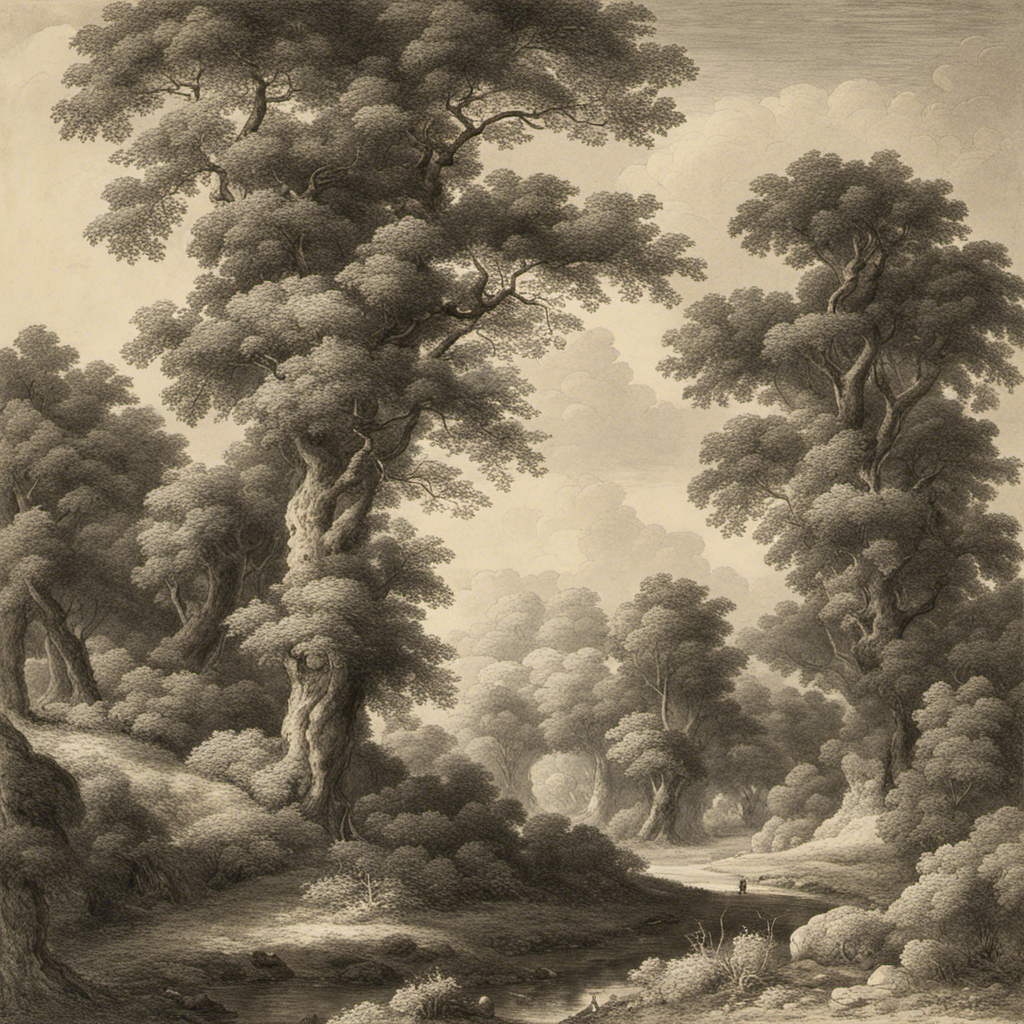

In [18]:
%pip install pillow
import base64
import io
from PIL import Image

base_64_img_str = response_body.get("artifacts")[0].get("base64")
image = Image.open(io.BytesIO(base64.decodebytes(bytes(base_64_img_str, "utf-8"))))
image